<a href="https://colab.research.google.com/github/AkramDataEngineering/ML_Loan-Prediction_Model/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Loan approval prediction refers to the use of machine learning techniques to predict the likelihood of a loan application being approved or denied by banks and financial institutions. By using advanced algorithms and predictive models, banks can streamline their loan approval processes and make informed decisions for the benefit of both lenders and borrowers.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [ ]:
loan = pd.read_csv("loan_prediction.csv")
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
#I’ll drop the loan id column and move further:
loan=loan.drop("Loan_ID",axis=1) # Run Once
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#Now let’s have a look if the data has missing values or not:
loan.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The data has missing values in some of the categorical columns and some numerical columns. Let’s have a look at the descriptive statistics of the dataset before filling in the missing values:

In [ ]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Now let’s fill in the missing values. In categorical columns, we can fill in missing values with the mode of each column. The mode represents the value that appears most often in the column and is an appropriate choice when dealing with categorical data:

In [ ]:
loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
loan["Gender"].value_counts() # So Using Mode we fill "M" in the gender column where data is missing

Gender
Male      489
Female    112
Name: count, dtype: int64

In [ ]:
loan["Gender"].fillna(loan["Gender"].mode()[0],inplace=True)

C:\Users\ah79168\AppData\Local\Temp\ipykernel_13600\94905178.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
#loan["Gender"].mode()
loan["Gender"].isnull().sum()

0

In [ ]:
loan["Gender"]

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

#SImilarly for all Categorical Column who have nulls

In [ ]:
loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
loan["Married"].fillna(loan["Married"].mode()[0],inplace=True) # Replaced null with mode in married
loan["Dependents"].fillna(loan["Dependents"].mode()[0],inplace=True) # Replaced null with mode in Dependent
loan["Self_Employed"].fillna(loan["Self_Employed"].mode()[0],inplace=True) # Replaced null with mode in Self Employed

C:\Users\ah79168\AppData\Local\Temp\ipykernel_13600\1324836986.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\ah79168\AppData\Local\Temp\ipykernel_13600\1324836986.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

To fill in the missing values of numerical columns, we have to choose appropriate measures:

1.We can fill in the missing values of the loan amount column with the median value. The median is an appropriate measure to fill in missing values when dealing with skewed distributions or when outliers are present in the data;
2.We can fill in the missing values of the loan amount term column with the mode value of the column. Since the term of the loan amount is a discrete value, the mode is an appropriate metric to use;
3.We can fill in the missing values of the credit history column with the mode value. Since credit history is a binary variable (0 or 1), the mode represents the most common value and is an appropriate choice for filling in missing values.

In [ ]:
loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# fill in the missing values of the loan amount column with the median value
loan["LoanAmount"].fillna(loan["LoanAmount"].median(),inplace = True)

#fill in the missing values of the loan amount term column with the mode value
loan["Loan_Amount_Term"].fillna(loan["Loan_Amount_Term"].mode()[0],inplace = True)

#fill in the missing values of the credit history column with the mode value
loan["Credit_History"].fillna(loan["Credit_History"].mode()[0],inplace= True)

C:\Users\ah79168\AppData\Local\Temp\ipykernel_13600\126447803.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\ah79168\AppData\Local\Temp\ipykernel_13600\126447803.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:
# loan["LoanAmount"].median()
# loan["Loan_Amount_Term"].mode()
# loan["Credit_History"].mode()
loan.isnull().sum() #Verification of Null Removal

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

                                ###                Exploratory Data Analysis                      ###

In [ ]:
#Now let’s have a look at the distribution of the loan status column:

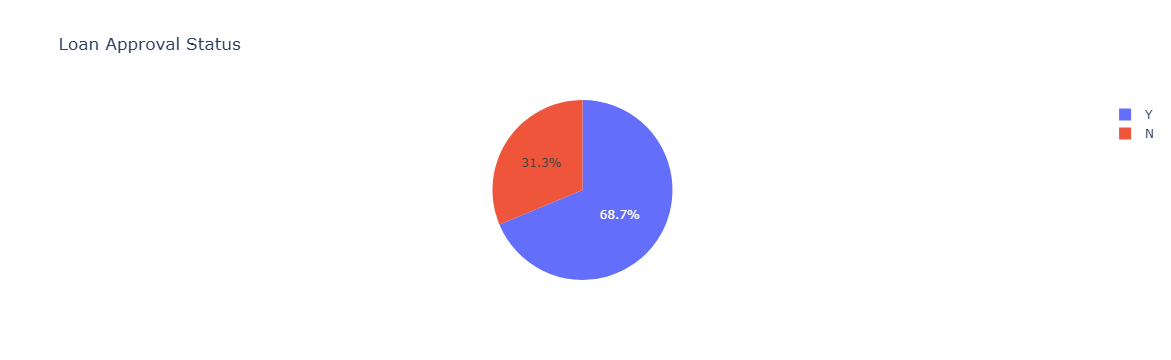

In [ ]:
import plotly.express as px

loan["Loan_Status"].value_counts()
loan_status_count = loan["Loan_Status"].value_counts()

fig_loan_status = px.pie(loan_status_count,names = loan_status_count.index , values = loan_status_count.values,title="Loan Approval Status")
fig_loan_status.show()

In [ ]:
loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
#Now let’s have a look at the distribution of the gender column:

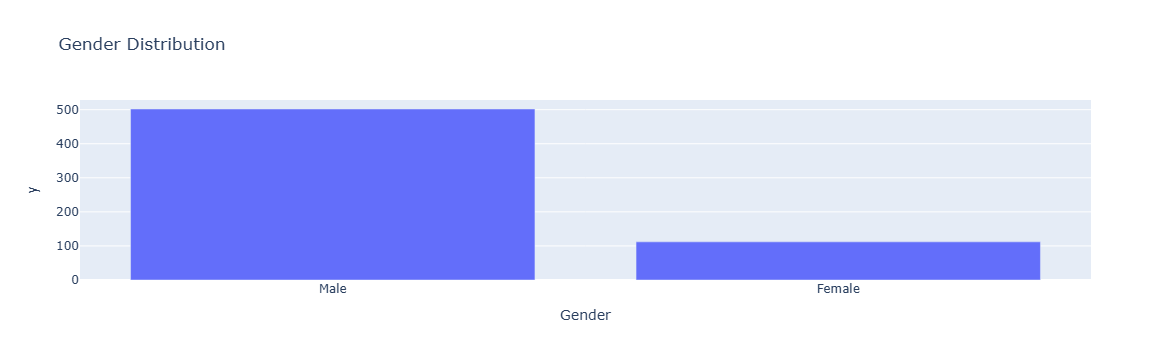

In [ ]:
Gender_Count = loan["Gender"].value_counts() # array Data

fig_Gender_Count = px.bar(Gender_Count,x=Gender_Count.index,y=Gender_Count.values,title = "Gender Distribution",)

fig_Gender_Count.show()

In [ ]:
#Now let’s have a look at the distribution of the martial status column:

In [ ]:
loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

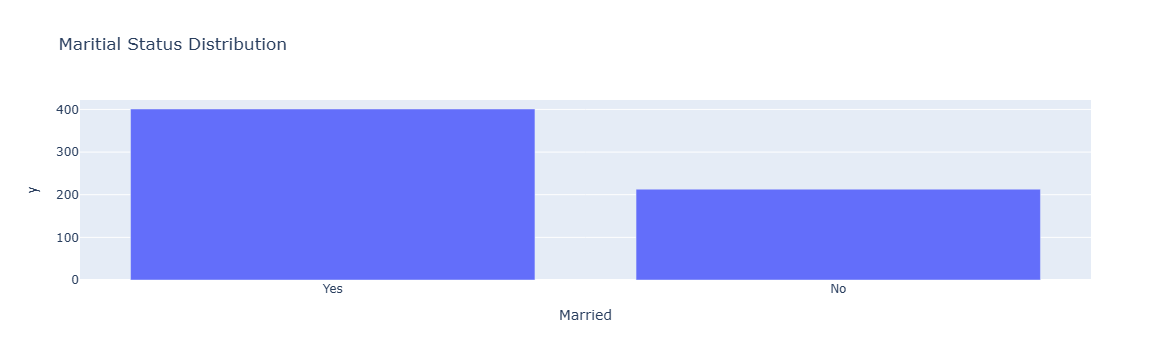

In [ ]:
marital_status = loan["Married"].value_counts()

fig_marital_status = px.bar(marital_status,x= marital_status.index, y = marital_status.values ,title="Maritial Status Distribution")

fig_marital_status.show()

In [ ]:
##Now let’s have a look at the distribution of the education column:

In [ ]:
loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

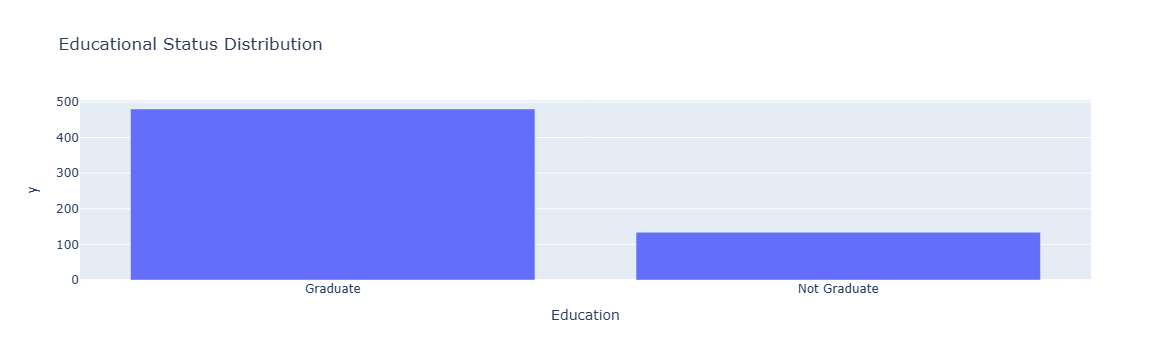

In [ ]:
education = loan["Education"].value_counts()

fig_education = px.bar(education,x = education.index ,y = education.values , title = "Educational Status Distribution")

fig_education.show()

In [ ]:
#Now let’s have a look at the distribution of the self-employment column:

In [ ]:
loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

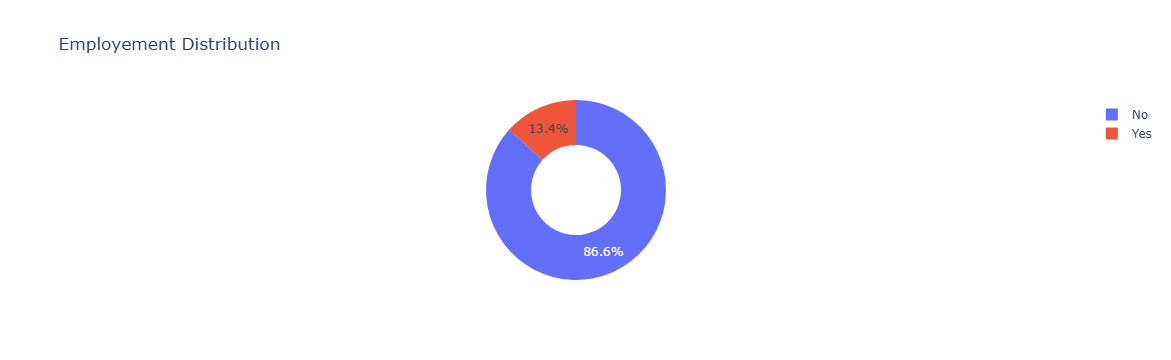

In [ ]:
employment = loan["Self_Employed"].value_counts()

fig_employment = px.pie(employment,names = employment.index , values = employment.values , title = "Employement Distribution",hole= 0.5)

fig_employment.show()

In [ ]:
#Now let’s have a look at the distribution of the Applicant Income column:

In [ ]:
loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

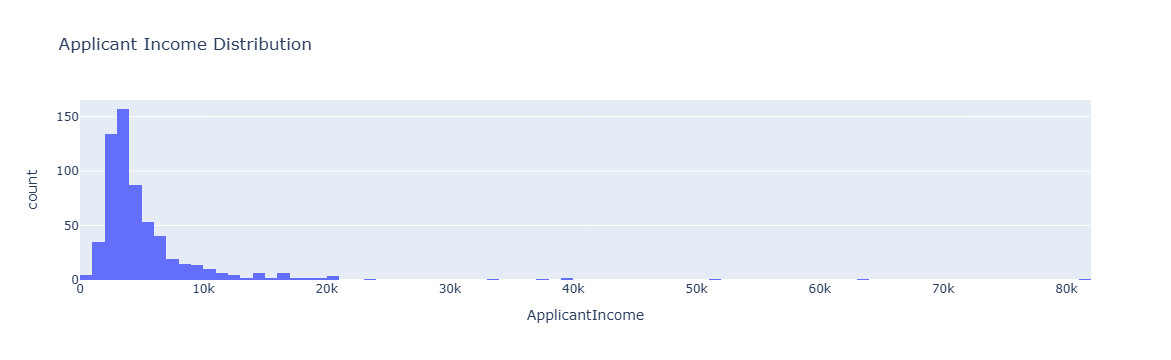

In [ ]:
fig_Income = px.histogram(loan,x = "ApplicantIncome",title = "Applicant Income Distribution")

fig_Income.show()

Now let’s have a look at the relationship between the income of the loan applicant and the loan status:

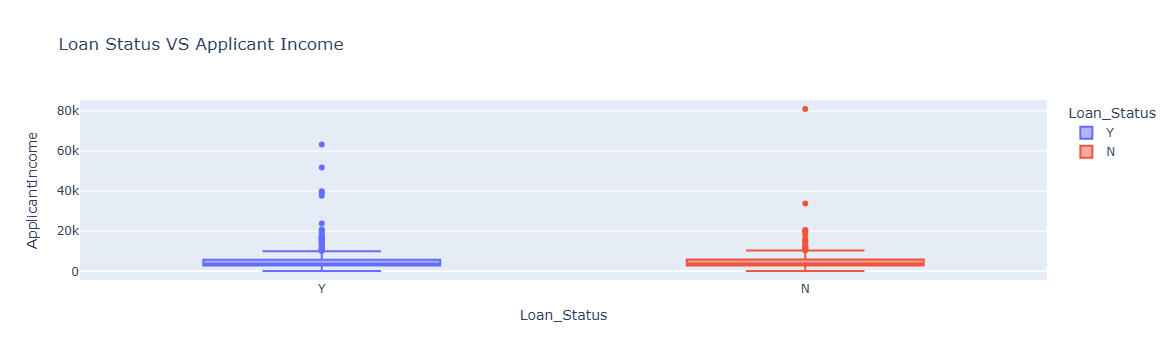

In [ ]:
fig_incomeVSLoanStatus = px.box(loan,x = "Loan_Status",y = "ApplicantIncome",color = "Loan_Status",title = "Loan Status VS Applicant Income")

fig_incomeVSLoanStatus.show()

The “ApplicantIncome” column contains outliers which need to be removed before moving further. Here’s how to remove the outliers:

In [ ]:
#Calculate the IQR :
Q1 = loan["ApplicantIncome"].quantile(0.25)
Q3 = loan["ApplicantIncome"].quantile(0.75)
IQR = Q3 - Q1
IQR

# DEFINE LOWER AND UPPER BOUNDS FOR OUTLIERS

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# REMOVE OUTLIERS :
loan = loan[ (loan["ApplicantIncome"] >= lower_bound) & (loan["ApplicantIncome"] <= upper_bound) ]
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Now let’s have a look at the relationship between the income of the loan co-applicant and the loan status:

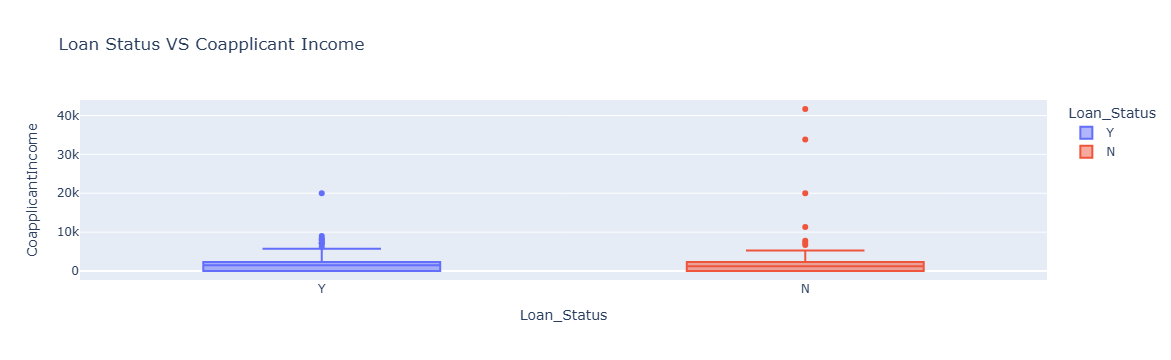

In [ ]:
fig_coapplicant_income = px.box(loan, x = "Loan_Status" , y = "CoapplicantIncome" , color = "Loan_Status" , title = "Loan Status VS Coapplicant Income")

fig_coapplicant_income.show()

The income of the loan co-applicant also contains outliers. Let’s remove the outliers from this column as well:

In [ ]:
#Calculate the IQR

q1 = loan["CoapplicantIncome"].quantile(0.25)
q3 = loan["CoapplicantIncome"].quantile(0.75)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
LB = q1 - 1.5 * iqr
UB = q3 + 1.5 * iqr

# REMOVE OUTLIERS in Co-APPLICANT INCOME DATA

loan  = loan[(loan["CoapplicantIncome"] >= LB) & (loan["CoapplicantIncome"] <= UB)]
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


!!Now let’s have a look at the relationship between the loan amount and the loan status:

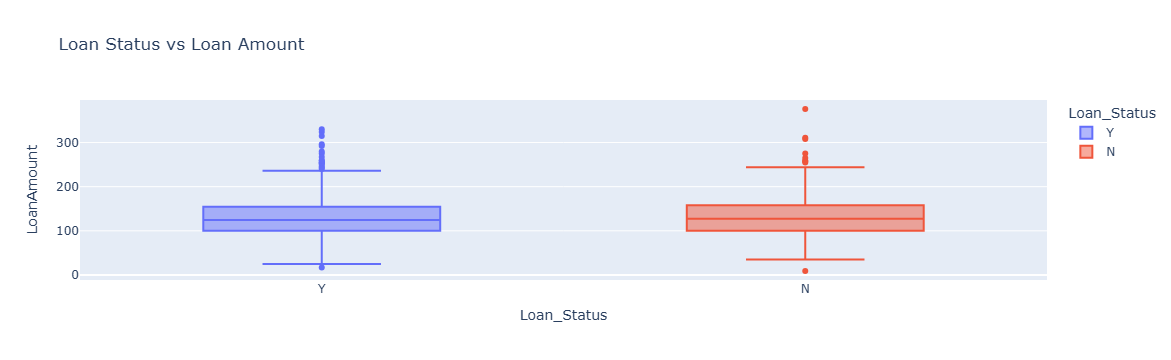

In [ ]:
fig_LoanAmountVSLoanStatus = px.box(loan , x = "Loan_Status", y = "LoanAmount" , color = "Loan_Status", title = "Loan Status vs Loan Amount")

fig_LoanAmountVSLoanStatus.show()

Now let’s have a look at the relationship between credit history and loan status

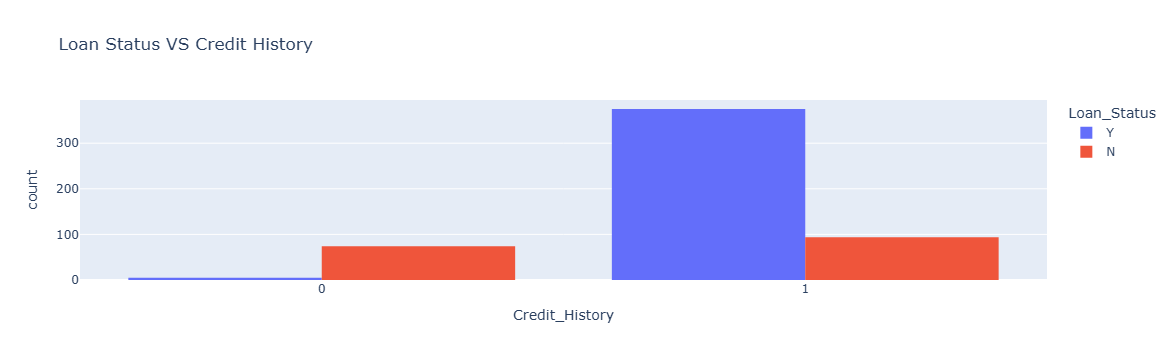

In [ ]:
fig_CreditVSStatus = px.histogram(loan , x = "Credit_History" , color= "Loan_Status" , barmode= "group" ,title = "Loan Status VS Credit History" )

fig_CreditVSStatus.show()

In [ ]:
loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Now let’s have a look at the relationship between the property area and the loan status:

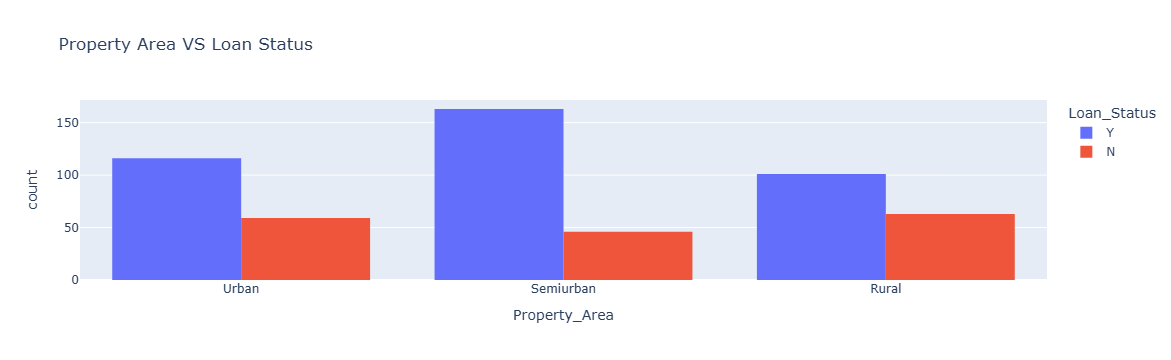

In [ ]:
fig_areaVSStatus = px.histogram(loan, x = "Property_Area" ,color = "Loan_Status" , barmode = "group" , title= "Property Area VS Loan Status" )

fig_areaVSStatus.show()

In [ ]:
pd.set_option('display.max_columns', None)

#########!                Data Preparation and Training Loan Approval Prediction Model   ####################################

In this step, we will:

1.Convert categorical columns into numerical ones;
2.Split the data into training and test sets;
3. Scale the numerical features;
4. Train the loan approval prediction model.

In [ ]:
## Convert categorical columns to numerical using one-hot encoding
bin_cat_columns = ["Gender","Married","Education","Self_Employed","Loan_Status"]
multi_cat_col = ['Property_Area','Dependents']

le = LabelEncoder()
# Label Encoding
for col in bin_cat_columns:
    loan[col] = le.fit_transform(loan[col])

# One-Hot Encoding
loan = pd.get_dummies(loan, columns=multi_cat_col,drop_first=True)


In [ ]:
loan.sample(5)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+
492,1,0,1,0,3691,0.0,110.0,360.0,1.0,1,False,False,False,False,False
491,1,1,1,0,5333,1131.0,186.0,360.0,1.0,1,False,True,True,False,False
565,1,1,1,0,4467,0.0,120.0,360.0,1.0,1,False,False,False,False,False
159,1,1,0,0,4583,5625.0,255.0,360.0,1.0,1,True,False,False,False,False
364,1,0,0,1,6822,0.0,141.0,360.0,1.0,1,False,False,False,False,False


In [ ]:

# SPLIT THE DATA INTO FEATURES(X) and TARGET(y)
X= loan.drop(columns="Loan_Status")
y = loan["Loan_Status"]


# Split the data into training and testing sets

X_train ,X_test,y_train,y_test = train_test_split(X,y ,test_size= 0.2, random_state= 42)


## Scale the numerical columns using StandardScaler
scaler = StandardScaler()
numerical_columns = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.fit_transform(X_test[numerical_columns])



In [ ]:
X_train.sample(5)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+
188,1,1,0,1,-1.854275,2.708966,0.739797,0.305159,0.402248,False,False,False,False,False
412,1,1,1,0,1.069335,-0.931554,1.719097,0.305159,-2.486027,False,False,False,False,False
329,0,0,0,0,-0.869673,-0.931554,-1.238390,0.305159,0.402248,False,True,False,False,False
565,1,1,1,0,0.190958,-0.931554,-0.200332,0.305159,0.402248,False,False,False,False,False
603,1,0,0,0,-0.235560,2.024994,0.818141,0.305159,0.402248,False,False,False,False,False


In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc


model = SVC(probability=True,random_state = 42)
model.fit(X_train,y_train)


SVC(probability=True, random_state=42)

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc


model_rf = RandomForestClassifier(random_state = 42)
model_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Now let’s make predictions on the test set:

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Needed for ROC curve

In [ ]:
#Now let’s make predictions on the test set:

y_pred_rf = model_rf.predict(X_test)
y_proba_rf = model_rf.predict_proba(X_test)[:, 1]  # Needed for ROC curve

In [ ]:
# Classification report of SVC Model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.49      0.63        35
           1       0.80      0.97      0.88        75

    accuracy                           0.82       110
   macro avg       0.85      0.73      0.75       110
weighted avg       0.83      0.82      0.80       110



In [ ]:
# Classification report of Random Forest
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.49      0.61        35
           1       0.80      0.95      0.87        75

    accuracy                           0.80       110
   macro avg       0.80      0.72      0.74       110
weighted avg       0.80      0.80      0.78       110



[[17 18]
 [ 2 73]]


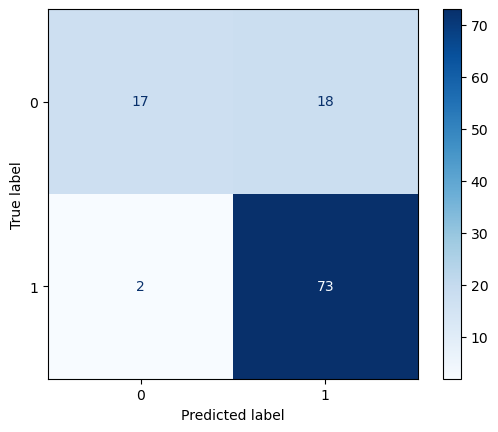

In [ ]:
# Confusion matrix of SVC
cm = confusion_matrix(y_test, y_pred)
print(cm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap=plt.cm.Blues)
plt.show()

[[17 18]
 [ 4 71]]


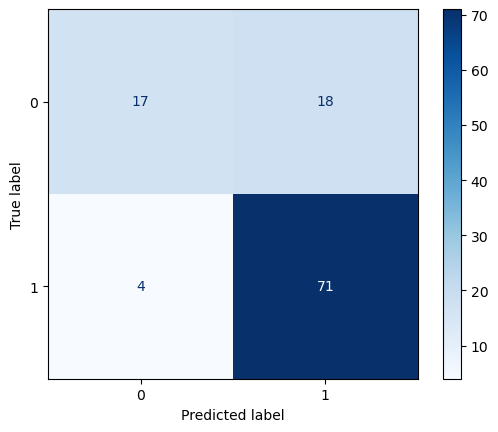

In [ ]:
# Confusion matrix of Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap=plt.cm.Blues)
plt.show()

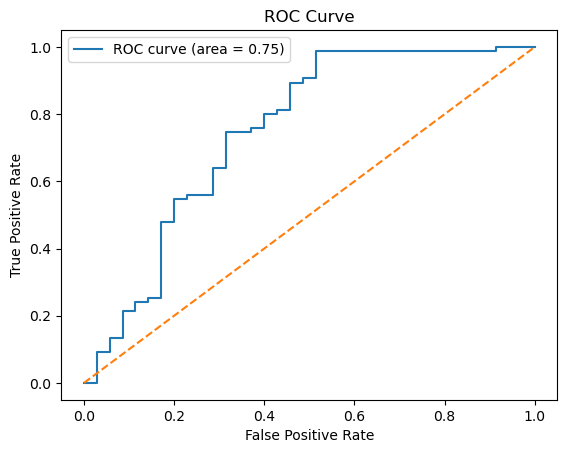

In [ ]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

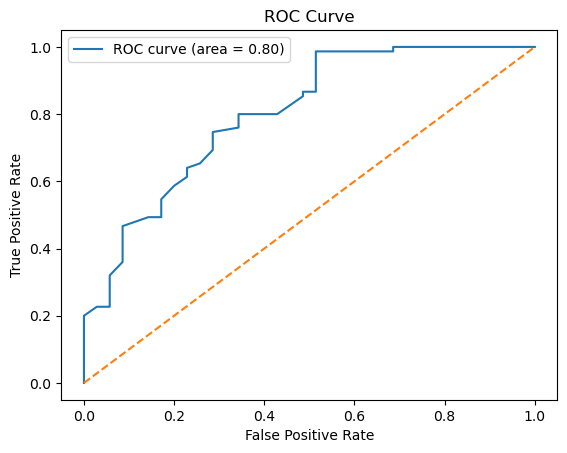

In [ ]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()